In [2]:
#Task
#building an end to end project for the apartments price prediction in kenya(done on mothly basis)
#credits to kaggle for the dataset..link https://www.kaggle.com/beverlyneakoth/apartment-prices-in-kenya

In [3]:
#import import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']==(20,15)
%matplotlib inline

In [4]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/apartments.csv')
df.head()

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [5]:
#exploring the dataset
df.shape

(2520, 7)

In [6]:
df.dtypes

Unnamed: 0     int64
title         object
location      object
bedrooms       int64
bathrooms      int64
price         object
rate          object
dtype: object

In [7]:
df.groupby('title')['title'].agg('count').head(3)

title
1 Bedroom Apartment / Flat to rent in Kileleshwa    127
1 Bedroom Apartment / Flat to rent in Nyali         125
1 Bedroom Apartment / Flat to rent in Shanzu        129
Name: title, dtype: int64

In [8]:
df.groupby('location')['location'].agg('count')

location
Grevillea Grove Spring Valley, Spring Valley, Nairobi    125
Jabavu court, Kilimani, Nairobi                           12
Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu              128
Kileleshwa Nairobi, Kileleshwa, Nairobi                  125
Kileleshwa, Nairobi                                      257
Kilimani, Nairobi                                        251
Links Rd Mombasa, Nyali, Mombasa                         126
Muthaiga, Nairobi                                        126
Near Valley Arcade, Lavington, Nairobi                    35
Nyali, Mombasa                                           125
Off Othaya road, Lavington, Nairobi                       20
Riverside Dr Nairobi, Riverside, Nairobi                 125
Shanzu, Mombasa                                          129
Thika Rd Nairobi, Kahawa Wendani, Nairobi                125
Vihiga road, Kileleshwa, Nairobi                          56
Westlands downtown, Westlands, Nairobi                   127
Westlands, Nair

In [9]:
df.head(2)

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month


In [10]:
#droping the unnamed and title columns ,they will have minimal influence towards the  price prediction
df1=df.drop(['Unnamed: 0','title'],axis='columns')
df1.head(4)

,location,bedrooms,bathrooms,price,rate
0,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month


In [11]:
df1.rate.unique()#we will need this column to specify the rate at which one might be interested to know the price

array(['Per Month', 'Per Day'], dtype=object)

In [12]:
#lets see any missing values
df1.isna().sum()

location     376
bedrooms       0
bathrooms      0
price          0
rate           0
dtype: int64

In [13]:
#i can simply drop all locations which a missing value
df2=df1.dropna()
df2.shape

(2144, 5)

In [14]:
#lets confirm no more missing values on our dataset
df2.isna().any()

location     False
bedrooms     False
bathrooms    False
price        False
rate         False
dtype: bool

In [15]:
#i wanna create another column based on the rate such that the rate per month will be equal to value 1
#n 0 for per day rate
df2['rateN']=df2.rate.apply(lambda x: 1 if x=='Per Month' else 0)

<ipython-input-15-7a946bd9478e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rateN']=df2.rate.apply(lambda x: 1 if x=='Per Month' else 0)


In [16]:
df2.sample(4)

,location,bedrooms,bathrooms,price,rate,rateN
2048,"Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu",3,3,55 000,Per Month,1
1694,"Westlands downtown, Westlands, Nairobi",2,2,75 000,Per Month,1
2138,"Kilimani, Nairobi",3,3,75 000,Per Month,1
1153,"Grevillea Grove Spring Valley, Spring Valley, ...",2,3,65 000,Per Month,1


In [17]:
df2.bedrooms.unique()

array([3, 1, 4, 2], dtype=int64)

In [18]:
df2.bathrooms.unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [19]:
df2.price.unique()

array([' 200 000', ' 70 000', ' 38 000', ' 80 000', ' 110 000', ' 57 750',
       ' 65 000', ' 5 000', ' 300 000', ' 165 000', ' 55 000', ' 75 000',
       ' 100 000', ' 125 000'], dtype=object)

In [20]:
df2.price.dtypes

dtype('O')

In [21]:
##the prices are kinda separated by a space thus not properly well read,
#i will convert them into float value

#how this function  works is that the price values are strings separated by 2 space,so we write a function to split the strings
#into 3 characters ,n then return a float of the second index and 3rd index
def convert_float(x):
    y=str(x)
    res=y.split(' ')
    if len(res)==3:
        return float(res[1]+res[2])

    
        

In [22]:
#this is how i need the function to do in the end,concatenate 2 strings and return  a float of this value
'22'+'4'

'224'

In [23]:
float('22'+'4')

224.0

In [24]:
#now lets test our function if it works
convert_float(' 75 750')

75750.0

In [25]:
#now we apply the function on the price column
df2.price=df2.price.apply(convert_float)
df2.head()

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,bedrooms,bathrooms,price,rate,rateN
0,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200000.0,Per Month,1
1,"Kileleshwa, Nairobi",3,4,70000.0,Per Month,1
2,"Links Rd Mombasa, Nyali, Mombasa",3,2,38000.0,Per Month,1
3,"Near Valley Arcade, Lavington, Nairobi",3,3,80000.0,Per Month,1
4,"Kileleshwa, Nairobi",1,1,110000.0,Per Month,1


In [26]:
#we can look quickly at the price column dtypes
df2.price.dtypes

dtype('float64')

In [27]:
df2.describe()

,bedrooms,bathrooms,price,rateN
count,2144.000000,2144.000000,2144.000000,2144.000000
mean,2.529851,2.470616,93363.689366,0.941698
std,0.979512,1.038716,68227.778336,0.234369
min,1.000000,1.000000,5000.000000,0.000000
25%,2.000000,2.000000,55000.000000,1.000000
50%,3.000000,2.000000,70000.000000,1.000000
75%,3.000000,3.000000,100000.000000,1.000000
max,4.000000,5.000000,300000.000000,1.000000


In [28]:
df2.dtypes

location      object
bedrooms       int64
bathrooms      int64
price        float64
rate          object
rateN          int64
dtype: object

In [29]:
df3=df2.copy()
df3.head(3)

,location,bedrooms,bathrooms,price,rate,rateN
0,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200000.0,Per Month,1
1,"Kileleshwa, Nairobi",3,4,70000.0,Per Month,1
2,"Links Rd Mombasa, Nyali, Mombasa",3,2,38000.0,Per Month,1


In [30]:
df3.price.describe()

count      2144.000000
mean      93363.689366
std       68227.778336
min        5000.000000
25%       55000.000000
50%       70000.000000
75%      100000.000000
max      300000.000000
Name: price, dtype: float64

In [31]:
df3.location.unique()

array(['Riverside Dr Nairobi, Riverside, Nairobi', 'Kileleshwa, Nairobi',
       'Links Rd Mombasa, Nyali, Mombasa',
       'Near Valley Arcade, Lavington, Nairobi',
       'Thika Rd Nairobi, Kahawa Wendani, Nairobi', 'Kilimani, Nairobi',
       'Nyali, Mombasa', 'Muthaiga, Nairobi', 'Westlands, Nairobi',
       'Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu', 'Shanzu, Mombasa',
       'Westlands downtown, Westlands, Nairobi',
       'Kileleshwa Nairobi, Kileleshwa, Nairobi',
       'Grevillea Grove Spring Valley, Spring Valley, Nairobi',
       'Vihiga road, Kileleshwa, Nairobi',
       'Off Othaya road, Lavington, Nairobi',
       'Jabavu court, Kilimani, Nairobi'], dtype=object)

In [32]:
#i will next write a function to remove the comma in the locations n return only a string spaced by a space only
def convert_comma_to_string(x):
    res=x.split(',')
    y=len(res)
    if y==4:
        return res[0]+res[1]+res[2]+res[3]
    elif y==3:
        return res[0]+res[1]+res[2]
    elif y==2:
        return res[0]+res[1]
    elif y==1:
        return res[0]
    else:
        return None
        
convert_comma_to_string('Links Rd Mombasa, Nyali, Mombasa')

'Links Rd Mombasa Nyali Mombasa'

In [33]:
#lets test to see if the function works
convert_comma_to_string('Off Othaya road')

'Off Othaya road'

In [34]:
convert_comma_to_string('Jabavu court, Kilimani, Nairobi')

'Jabavu court Kilimani Nairobi'

In [35]:
convert_comma_to_string('Kileleshwa, Nairobi')

'Kileleshwa Nairobi'

In [36]:
#my function seems to working pretty good
#i now apply it to the ddf3.location column to have locations with no commas in it
df3.location=df3.location.apply(convert_comma_to_string)
df3.shape

(2144, 6)

In [37]:
df3.sample(5)

,location,bedrooms,bathrooms,price,rate,rateN
1483,Shanzu Mombasa,1,1,55000.0,Per Month,1
160,Westlands downtown Westlands Nairobi,2,2,75000.0,Per Month,1
1811,Nyali Mombasa,1,1,5000.0,Per Day,0
1584,Nyali Mombasa,1,1,5000.0,Per Day,0
620,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,3,3,55000.0,Per Month,1


In [38]:
df4=df3.copy()
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Kileleshwa Nairobi                                     257
Westlands Nairobi                                      252
Kilimani Nairobi                                       251
Shanzu Mombasa                                         129
Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu              128
Westlands downtown Westlands Nairobi                   127
Muthaiga Nairobi                                       126
Links Rd Mombasa Nyali Mombasa                         126
Kileleshwa Nairobi Kileleshwa Nairobi                  125
Grevillea Grove Spring Valley Spring Valley Nairobi    125
Nyali Mombasa                                          125
Riverside Dr Nairobi Riverside Nairobi                 125
Thika Rd Nairobi Kahawa Wendani Nairobi                125
Vihiga road Kileleshwa Nairobi                          56
Near Valley Arcade Lavington Nairobi                    35
Off Othaya road Lavington Nairobi                       20
Jabavu court Kilimani Nairobi                  

In [39]:
#we now handle the outlier detection and removal
df4[df4.rateN==0].head(5)


,location,bedrooms,bathrooms,price,rate,rateN
8,Nyali Mombasa,1,1,5000.0,Per Day,0
10,Nyali Mombasa,1,1,5000.0,Per Day,0
31,Nyali Mombasa,1,1,5000.0,Per Day,0
51,Nyali Mombasa,1,1,5000.0,Per Day,0
72,Nyali Mombasa,1,1,5000.0,Per Day,0


In [40]:
#so these per day rates are only for one location (nyali mombasa) ,n these values might affect my model perfoamnce
#so am gonna mark them as outliers and simply get rid of them
df5=df4[df4.rateN==1]
df5.head()

,location,bedrooms,bathrooms,price,rate,rateN
0,Riverside Dr Nairobi Riverside Nairobi,3,3,200000.0,Per Month,1
1,Kileleshwa Nairobi,3,4,70000.0,Per Month,1
2,Links Rd Mombasa Nyali Mombasa,3,2,38000.0,Per Month,1
3,Near Valley Arcade Lavington Nairobi,3,3,80000.0,Per Month,1
4,Kileleshwa Nairobi,1,1,110000.0,Per Month,1


In [41]:
df5.shape

(2019, 6)

In [42]:
#now im gonna plot some scatter charts for the price against bedrooms and bathrooms
def plot_scatter_chart(df,location):
    matplotlib.rcParams['figure.figsize']==(20,10)
    plt.scatter(df.bedrooms,df.price,color='blue',label='bedrooms',s=50)
    plt.scatter(df.bathrooms,df.price,marker='+',color='green',label='bathrooms',s=50)
    plt.xlabel('Bed & Bath count')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

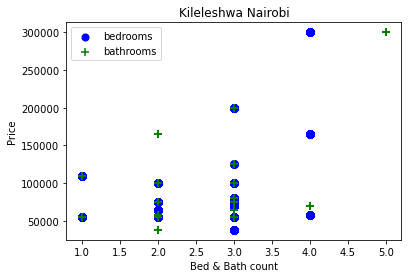

In [43]:
plot_scatter_chart(df5,'Kileleshwa Nairobi')

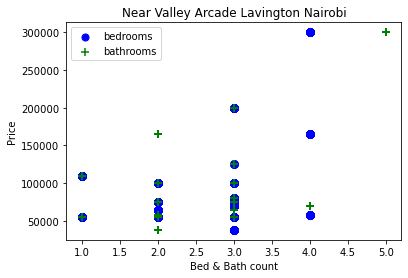

In [44]:
plot_scatter_chart(df5,'Near Valley Arcade Lavington Nairobi')

In [45]:
#we can use some feature engineering techniques to filter some outliers
#i will create a price per bedroom and price per bathroom columns to see if we can detect some outliers

In [46]:
df5['price_per_bd']=df5['price']/df5['bedrooms']
df5['price_per_bt']=df5['price']/df5['bathrooms']
df5.head()

<ipython-input-46-0f0c64d623b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_bd']=df5['price']/df5['bedrooms']
<ipython-input-46-0f0c64d623b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_bt']=df5['price']/df5['bathrooms']


,location,bedrooms,bathrooms,price,rate,rateN,price_per_bd,price_per_bt
0,Riverside Dr Nairobi Riverside Nairobi,3,3,200000.0,Per Month,1,66666.666667,66666.666667
1,Kileleshwa Nairobi,3,4,70000.0,Per Month,1,23333.333333,17500.000000
2,Links Rd Mombasa Nyali Mombasa,3,2,38000.0,Per Month,1,12666.666667,19000.000000
3,Near Valley Arcade Lavington Nairobi,3,3,80000.0,Per Month,1,26666.666667,26666.666667
4,Kileleshwa Nairobi,1,1,110000.0,Per Month,1,110000.000000,110000.000000


In [47]:
#i will do some price scaling to get a better interval
df5['price_per_bt']=df5['price_per_bt']/10000
df5['price_per_bd']=df5['price_per_bd']/10000
df5.head()

<ipython-input-47-f0b6d76aefb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_bt']=df5['price_per_bt']/10000
<ipython-input-47-f0b6d76aefb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_bd']=df5['price_per_bd']/10000


,location,bedrooms,bathrooms,price,rate,rateN,price_per_bd,price_per_bt
0,Riverside Dr Nairobi Riverside Nairobi,3,3,200000.0,Per Month,1,6.666667,6.666667
1,Kileleshwa Nairobi,3,4,70000.0,Per Month,1,2.333333,1.750000
2,Links Rd Mombasa Nyali Mombasa,3,2,38000.0,Per Month,1,1.266667,1.900000
3,Near Valley Arcade Lavington Nairobi,3,3,80000.0,Per Month,1,2.666667,2.666667
4,Kileleshwa Nairobi,1,1,110000.0,Per Month,1,11.000000,11.000000


Text(0, 0.5, 'count')

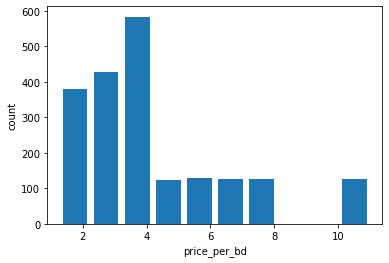

In [48]:
#i will plot a histogram to see my distribution
import matplotlib
matplotlib.rcParams['figure.figsize']==(10,15)
plt.hist(df5.price_per_bd,rwidth=0.8)
plt.xlabel('price_per_bd')
plt.ylabel('count')

In [49]:
#the above kinda looks like a normal distribution(looking pretty good)

In [50]:
#next i will drop some columns which are nolonger needed anylonger
df6=df5.drop(['rate','rateN','price_per_bt','price_per_bd'],axis='columns')
df6.head()

,location,bedrooms,bathrooms,price
0,Riverside Dr Nairobi Riverside Nairobi,3,3,200000.0
1,Kileleshwa Nairobi,3,4,70000.0
2,Links Rd Mombasa Nyali Mombasa,3,2,38000.0
3,Near Valley Arcade Lavington Nairobi,3,3,80000.0
4,Kileleshwa Nairobi,1,1,110000.0


In [53]:
#getting dummy variables for the location column
dummies=pd.get_dummies(df6.location)
dummies.head(10)

,Grevillea Grove Spring Valley Spring Valley Nairobi,Jabavu court Kilimani Nairobi,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,Kileleshwa Nairobi,Kileleshwa Nairobi Kileleshwa Nairobi,Kilimani Nairobi,Links Rd Mombasa Nyali Mombasa,Muthaiga Nairobi,Near Valley Arcade Lavington Nairobi,Off Othaya road Lavington Nairobi,Riverside Dr Nairobi Riverside Nairobi,Shanzu Mombasa,Thika Rd Nairobi Kahawa Wendani Nairobi,Vihiga road Kileleshwa Nairobi,Westlands Nairobi,Westlands downtown Westlands Nairobi
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df7=pd.concat([df6,dummies],axis='columns')
df7.head()

,location,bedrooms,bathrooms,price,Grevillea Grove Spring Valley Spring Valley Nairobi,Jabavu court Kilimani Nairobi,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,Kileleshwa Nairobi,Kileleshwa Nairobi Kileleshwa Nairobi,Kilimani Nairobi,Links Rd Mombasa Nyali Mombasa,Muthaiga Nairobi,Near Valley Arcade Lavington Nairobi,Off Othaya road Lavington Nairobi,Riverside Dr Nairobi Riverside Nairobi,Shanzu Mombasa,Thika Rd Nairobi Kahawa Wendani Nairobi,Vihiga road Kileleshwa Nairobi,Westlands Nairobi,Westlands downtown Westlands Nairobi
0,Riverside Dr Nairobi Riverside Nairobi,3,3,200000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Kileleshwa Nairobi,3,4,70000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Links Rd Mombasa Nyali Mombasa,3,2,38000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Near Valley Arcade Lavington Nairobi,3,3,80000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Kileleshwa Nairobi,1,1,110000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
X=df7.drop(['price','location'],axis='columns')
X.head()

,bedrooms,bathrooms,Grevillea Grove Spring Valley Spring Valley Nairobi,Jabavu court Kilimani Nairobi,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,Kileleshwa Nairobi,Kileleshwa Nairobi Kileleshwa Nairobi,Kilimani Nairobi,Links Rd Mombasa Nyali Mombasa,Muthaiga Nairobi,Near Valley Arcade Lavington Nairobi,Off Othaya road Lavington Nairobi,Riverside Dr Nairobi Riverside Nairobi,Shanzu Mombasa,Thika Rd Nairobi Kahawa Wendani Nairobi,Vihiga road Kileleshwa Nairobi,Westlands Nairobi,Westlands downtown Westlands Nairobi
0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
y=df7.price
y.head()

0    200000.0
1     70000.0
2     38000.0
3     80000.0
4    110000.0
Name: price, dtype: float64

In [66]:
#next i will create dummy values for the location column
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df6.location=le.fit_transform(df6.location)
#df6.head()

In [67]:
#i will now split my data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [68]:
len(X_train)

1615

In [69]:
len(X_test)

404

In [70]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [71]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
lr.score(X_test,y_test)

0.9972939040999762

In [73]:
#i will now write a function to get me the best perfoming model

In [74]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [75]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4447497907.832477, tolerance: 592272813.5594039
  model = cd_fast.enet_coordinate_descent(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3443195550.7484684, tolerance: 575103183.0688852
  model = cd_fast.enet_coordinate_descent(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111900106.5216274, tolerance: 561066501.0594038
  model = cd_fast.enet_coordinate_descent(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

,model,best_score,best_params
0,linear_regression,0.997151,{'normalize': True}
1,lasso,0.997152,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,1.000000,"{'criterion': 'mse', 'splitter': 'best'}"
3,svm,1.000000,"{'C': 1, 'kernel': 'linear'}"
4,random_forest,1.000000,{}
5,logistic_regression,1.000000,{}


In [76]:
#from the above i can choose the best algorithm to create my model
#i will simply employ svm for my model creation
model=SVC()
model.fit(X_train,y_train)

SVC()

In [77]:
#let me get the score of the model
model.score(X_test,y_test)

1.0

In [84]:
X_test.head()

,bedrooms,bathrooms,Grevillea Grove Spring Valley Spring Valley Nairobi,Jabavu court Kilimani Nairobi,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,Kileleshwa Nairobi,Kileleshwa Nairobi Kileleshwa Nairobi,Kilimani Nairobi,Links Rd Mombasa Nyali Mombasa,Muthaiga Nairobi,Near Valley Arcade Lavington Nairobi,Off Othaya road Lavington Nairobi,Riverside Dr Nairobi Riverside Nairobi,Shanzu Mombasa,Thika Rd Nairobi Kahawa Wendani Nairobi,Vihiga road Kileleshwa Nairobi,Westlands Nairobi,Westlands downtown Westlands Nairobi
189,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2068,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1595,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1066,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
405,4,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [79]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([200000., 165000., 100000.,  55000.,  57750.,  70000., 100000.,
        80000.,  80000., 100000.])

In [80]:
y_test[:10]

189     200000.0
2068    165000.0
1595    100000.0
1066     55000.0
405      57750.0
356      70000.0
2498    100000.0
2415     80000.0
2394     80000.0
1616    100000.0
Name: price, dtype: float64

In [81]:
##from the above predictions ,my model is absolutely predicting the correct results

In [82]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)


Text(159.0, 0.5, 'Truth')

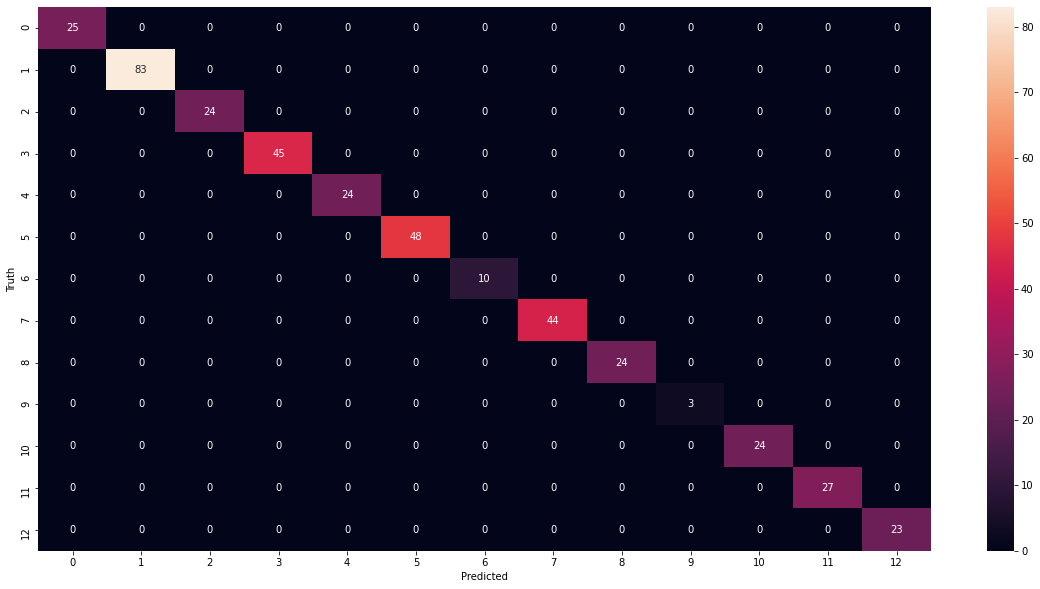

In [83]:
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

Classification Report: 
               precision    recall  f1-score   support

     38000.0       1.00      1.00      1.00        25
     55000.0       1.00      1.00      1.00        83
     57750.0       1.00      1.00      1.00        24
     65000.0       1.00      1.00      1.00        45
     70000.0       1.00      1.00      1.00        24
     75000.0       1.00      1.00      1.00        48
     80000.0       1.00      1.00      1.00        10
    100000.0       1.00      1.00      1.00        44
    110000.0       1.00      1.00      1.00        24
    125000.0       1.00      1.00      1.00         3
    165000.0       1.00      1.00      1.00        24
    200000.0       1.00      1.00      1.00        27
    300000.0       1.00      1.00      1.00        23

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [87]:
X_train.head(1)

,bedrooms,bathrooms,Grevillea Grove Spring Valley Spring Valley Nairobi,Jabavu court Kilimani Nairobi,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,Kileleshwa Nairobi,Kileleshwa Nairobi Kileleshwa Nairobi,Kilimani Nairobi,Links Rd Mombasa Nyali Mombasa,Muthaiga Nairobi,Near Valley Arcade Lavington Nairobi,Off Othaya road Lavington Nairobi,Riverside Dr Nairobi Riverside Nairobi,Shanzu Mombasa,Thika Rd Nairobi Kahawa Wendani Nairobi,Vihiga road Kileleshwa Nairobi,Westlands Nairobi,Westlands downtown Westlands Nairobi
2519,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [92]:
#let me write the predict price function 
def predict_price(location,bedrooms,bathrooms):
    loc_index=np.where(X.columns==location)[0][0]#this method helps locate the columns index
    x=np.zeros(len(X.columns))
    x[0]=bedrooms
    x[1]=bathrooms
    if loc_index>=0:
        x[loc_index]=1##here we are setting our particular index to be 1
        
    return model.predict([x])[0]

In [94]:
X.columns

Index(['bedrooms', 'bathrooms',
       'Grevillea Grove Spring Valley Spring Valley Nairobi',
       'Jabavu court Kilimani Nairobi',
       'Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu', 'Kileleshwa Nairobi',
       'Kileleshwa Nairobi Kileleshwa Nairobi', 'Kilimani Nairobi',
       'Links Rd Mombasa Nyali Mombasa', 'Muthaiga Nairobi',
       'Near Valley Arcade Lavington Nairobi',
       'Off Othaya road Lavington Nairobi',
       'Riverside Dr Nairobi Riverside Nairobi', 'Shanzu Mombasa',
       'Thika Rd Nairobi Kahawa Wendani Nairobi',
       'Vihiga road Kileleshwa Nairobi', 'Westlands Nairobi',
       'Westlands downtown Westlands Nairobi'],
      dtype='object')

In [93]:
predict_price('Grevillea Grove Spring Valley Spring Valley Nairobi',2,3)

65000.0

In [97]:
X_test.head(7)

,bedrooms,bathrooms,Grevillea Grove Spring Valley Spring Valley Nairobi,Jabavu court Kilimani Nairobi,Kikuyu Town Bus park Kikuyu Kikuyu Kikuyu,Kileleshwa Nairobi,Kileleshwa Nairobi Kileleshwa Nairobi,Kilimani Nairobi,Links Rd Mombasa Nyali Mombasa,Muthaiga Nairobi,Near Valley Arcade Lavington Nairobi,Off Othaya road Lavington Nairobi,Riverside Dr Nairobi Riverside Nairobi,Shanzu Mombasa,Thika Rd Nairobi Kahawa Wendani Nairobi,Vihiga road Kileleshwa Nairobi,Westlands Nairobi,Westlands downtown Westlands Nairobi
189,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2068,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1595,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1066,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
405,4,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
356,3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2498,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [99]:
y_test[:7]

189     200000.0
2068    165000.0
1595    100000.0
1066     55000.0
405      57750.0
356      70000.0
2498    100000.0
Name: price, dtype: float64

In [100]:
predict_price('Riverside Dr Nairobi Riverside Nairobi',3,3)#comparing if the function is giving the correct prediction as in 
#y_test

200000.0

In [106]:
##booooom my predict function is working pretty good
predict_price('Links Rd Mombasa Nyali Mombasa',2,3)

65000.0

In [109]:
predict_price('Muthaiga Nairobi',3,6)

300000.0

In [110]:
#the model is doing predictions based on the data provided,
#not many locations which were provided in the dataset--reason for not being in a position to cover most locations

In [111]:
#next i am gonna save my model as a pickle file
#save my columns as a json file
#n then develop a python flask server to consume this pickle file into to doing predictions on a website

In [112]:
import pickle
with open('apartment_prices_kenya.pickle','wb') as f:
    pickle.dump(model,f)

In [113]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('a_columns.jason','w') as f:
    f.write(json.dumps(columns))